# Exercise: 311 Requests

#### Summary

In NYC, you can call 311 with *anything* about the city - questions, complaints, etc. We'll be analyzing requests from 2015-2016 from the Department of Transportation and NYPD.

#### Data Source(s)

Filtered from full set, https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

#### Files

- `311-requests/311_Service_Requests_from_2010_to_Present.csv`, about 1.8 million rows (over 1GB of data)

#### Data dictionary

Visit [this page](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9#schema-preview) and click 'Show more' on the bottom right of the list (53 columns).

#### Skills

- Opening large files
- Time

## Opening the file

It's a big one! If your computer is slow or you only have 2GB of RAM, you might want to specify `nrows=50000` (or less). Increase the number until it takes around 20 seconds, maybe!

In [161]:
%%time
%matplotlib inline
import pandas as pd
df = pd.read_csv('data/311_Service_Requests_from_2010_to_Present.csv', nrows = 100000, low_memory=False)
df.head()

CPU times: user 1.79 s, sys: 231 ms, total: 2.02 s
Wall time: 2.5 s


In [162]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31463990,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10460.0,1110 WYATT STREET,WYATT STREET,DEVOE AVENUE,BRONX PARK AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,09/05/2015 06:55:25 AM,The Police Department responded and upon arriv...,09/05/2015 02:06:54 AM,06 BRONX,BRONX,1018201.0,245083.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.839306,-73.877301,"(40.83930620730105, -73.8773009180668)"
1,31463991,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,NaN,NaN,NaN,NaN,WEST 151 STREET,BROADWAY,INTERSECTION,NEW YORK,NaN,Precinct,Closed,09/04/2015 09:53:45 PM,The Police Department responded to the complai...,09/04/2015 06:37:24 PM,09 MANHATTAN,MANHATTAN,998728.0,241754.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.830222,-73.947684,"(40.830222460372724, -73.94768359377827)"
2,31463992,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,545 WEST 144 STREET,WEST 144 STREET,AMSTERDAM AVENUE,BROADWAY,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,09/05/2015 05:15:43 AM,The Police Department responded to the complai...,09/04/2015 10:32:02 PM,09 MANHATTAN,MANHATTAN,998263.0,239889.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.825104,-73.949368,"(40.825104318551325, -73.94936777115372)"
3,31463993,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11203.0,UTICA AVENUE,UTICA AVENUE,AVENUE D,FOSTER AVENUE,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Closed,09/05/2015 09:06:57 AM,The Police Department responded to the complai...,09/05/2015 02:26:44 AM,17 BROOKLYN,BROOKLYN,1003890.0,172805.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640965,-73.929232,"(40.64096464471428, -73.92923194083798)"
4,31463995,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,Street/Sidewalk,11210.0,GLENWOOD ROAD,GLENWOOD ROAD,BROOKLYN AVENUE,EAST 37 STREET,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Closed,09/04/2015 03:48:25 PM,The Police Department responded to the complai...,09/04/2015 05:21:19 PM,17 BROOKLYN,BROOKLYN,1000480.0,170405.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634384,-73.941525,"(40.63438406330588, -73.9415248319131)"


### Measuring time in Jupyter Notebooks

How long did that take? Read it in again, but this time **time how long it takes.** (and no, not with your watch - with Jupyter!)

In [163]:
#timer created above

### Look at the first few rows

Make sure you can see **every single column.**

In [164]:
pd.set_option('display.max_columns', 53)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31463990,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10460.0,1110 WYATT STREET,WYATT STREET,DEVOE AVENUE,BRONX PARK AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,09/05/2015 06:55:25 AM,The Police Department responded and upon arriv...,09/05/2015 02:06:54 AM,06 BRONX,BRONX,1018201.0,245083.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.839306,-73.877301,"(40.83930620730105, -73.8773009180668)"
1,31463991,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,NaN,NaN,NaN,NaN,WEST 151 STREET,BROADWAY,INTERSECTION,NEW YORK,NaN,Precinct,Closed,09/04/2015 09:53:45 PM,The Police Department responded to the complai...,09/04/2015 06:37:24 PM,09 MANHATTAN,MANHATTAN,998728.0,241754.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.830222,-73.947684,"(40.830222460372724, -73.94768359377827)"
2,31463992,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,545 WEST 144 STREET,WEST 144 STREET,AMSTERDAM AVENUE,BROADWAY,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,09/05/2015 05:15:43 AM,The Police Department responded to the complai...,09/04/2015 10:32:02 PM,09 MANHATTAN,MANHATTAN,998263.0,239889.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.825104,-73.949368,"(40.825104318551325, -73.94936777115372)"
3,31463993,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11203.0,UTICA AVENUE,UTICA AVENUE,AVENUE D,FOSTER AVENUE,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Closed,09/05/2015 09:06:57 AM,The Police Department responded to the complai...,09/05/2015 02:26:44 AM,17 BROOKLYN,BROOKLYN,1003890.0,172805.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640965,-73.929232,"(40.64096464471428, -73.92923194083798)"
4,31463995,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,Street/Sidewalk,11210.0,GLENWOOD ROAD,GLENWOOD ROAD,BROOKLYN AVENUE,EAST 37 STREET,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Closed,09/04/2015 03:48:25 PM,The Police Department responded to the complai...,09/04/2015 05:21:19 PM,17 BROOKLYN,BROOKLYN,1000480.0,170405.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634384,-73.941525,"(40.63438406330588, -73.9415248319131)"


### Speeding things up

We're going to be looking at open and close times, agencies, and the complaints (both types and descriptor). The only kind of location-based thing we'll want is borough.

**How much faster is it if we only read in those columns?**

In [165]:
#open, close, agencyies, compliaint, borough
#Created Date, Closed Date, Agency, Complaint Type, Descriptor, Borough 
%time
df2 = pd.read_csv('data/311_Service_Requests_from_2010_to_Present.csv', nrows = 100000, usecols=['Created Date', 'Closed Date', 'Agency', 'Complaint Type', 'Descriptor', 'Borough'])
df2.head()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough
0,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,BRONX
1,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN
2,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN
3,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,Noise - Commercial,Loud Music/Party,BROOKLYN
4,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,Illegal Parking,Overnight Commercial Storage,BROOKLYN


## Converting the 'Created Date' and 'Closed Date' columns to datetimes

### First, testing some things out

Let's take a look at converting **Created Date**, but **not all at once**.

1. Take 10,000 of them and try to convert them **without** a format string. Time it.
2. Take the same 10,000 and try to convert them **with** a format string. Time it.

If you tried to do all 1.8 million rows, **how long might it take with a format string vs without?**

In [166]:
%time
pd.to_datetime(df2['Created Date'])
df2.head()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough
0,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,BRONX
1,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN
2,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN
3,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,Noise - Commercial,Loud Music/Party,BROOKLYN
4,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,Illegal Parking,Overnight Commercial Storage,BROOKLYN


In [167]:
df2['created_at'] =pd.to_datetime(df2['Created Date'],format = "%m/%d/%Y %I:%M:%S %p")
df2.head()

,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough,created_at
0,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,BRONX,2015-09-04 22:55:25
1,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 13:53:45
2,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 21:15:43
3,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,Noise - Commercial,Loud Music/Party,BROOKLYN,2015-09-05 01:06:57
4,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,Illegal Parking,Overnight Commercial Storage,BROOKLYN,2015-09-04 07:48:25


In [168]:
df2['closed_at'] =pd.to_datetime(df2['Closed Date'],format = "%m/%d/%Y %I:%M:%S %p")
df2.head()

,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough,created_at,closed_at
0,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,BRONX,2015-09-04 22:55:25,2015-09-05 02:06:54
1,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 13:53:45,2015-09-04 18:37:24
2,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 21:15:43,2015-09-04 22:32:01
3,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,Noise - Commercial,Loud Music/Party,BROOKLYN,2015-09-05 01:06:57,2015-09-05 02:26:43
4,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,Illegal Parking,Overnight Commercial Storage,BROOKLYN,2015-09-04 07:48:25,2015-09-04 17:21:18


### Creating new columns

Create new columns called `created_at` and `closed_at` from the `Created Date` and `Closed Date` columns. Do them individually, and **time them**.

In [169]:
#added above 

### Confirming they look okay

Take a look at the first few rows to make sure the dates look correct, and then make sure their data type is `datetime64[ns]`.

In [170]:
#check 

# Examining agencies

Who has more 311 requests, the Department of Transportation or the NYPD?

In [171]:
df['Agency'].value_counts()

NYPD    72041
DOT     27959
Name: Agency, dtype: int64

## What's the difference between "Complaint Type" and "Descriptor" columns?

In [172]:
#Complaint type = where/what was going on
#Descriptor = the specifics of the case 

## What are the most popular categories of complaints for the NYPD? For the DOT?

In [173]:
df2['Complaint Type'].value_counts().head(5)

Noise - Residential       25357
Blocked Driveway          11817
Illegal Parking           11221
Street Light Condition    10751
Street Condition           8552
Name: Complaint Type, dtype: int64

In [174]:
df2.groupby('Agency')['Complaint Type'].value_counts()

Agency  Complaint Type             
DOT     Street Light Condition         10751
        Street Condition                8552
        Traffic Signal Condition        3889
        Broken Muni Meter               1642
        Sidewalk Condition               690
        Street Sign - Damaged            486
        Street Sign - Missing            456
        Highway Condition                432
        DOT Literature Request           345
        Curb Condition                   259
        Street Sign - Dangling           189
        Bridge Condition                  58
        Ferry Inquiry                     49
        Agency Issues                     35
        Bus Stop Shelter Placement        34
        Ferry Complaint                   33
        Bike Rack Condition               21
        Highway Sign - Damaged             8
        Highway Sign - Missing             6
        Parking Card                       6
        Ferry Permit                       5
        Municipal P

## When people are complaining about street conditions, what are they usually complaining about?

In [175]:
df3 = df[df2['Complaint Type'] == 'Street Condition']
df3['Descriptor'].value_counts().head(3)

Pothole               4255
Cave-in               1323
Defective Hardware     705
Name: Descriptor, dtype: int64

In [176]:
#or can do it this way 
df[df2['Complaint Type'] == 'Street Condition']['Descriptor'].value_counts().head()

Pothole                           4255
Cave-in                           1323
Defective Hardware                 705
Rough, Pitted or Cracked Roads     692
Failed Street Repair               457
Name: Descriptor, dtype: int64

## What kinds of noise are they complaining about when making residential noise complaints?

In [177]:
df[df2['Complaint Type'] == 'Noise - Residential']['Descriptor'].value_counts()

Loud Music/Party    17510
Banging/Pounding     5525
Loud Talking         1979
Loud Television       343
Name: Descriptor, dtype: int64

# Timing our complaints

How many complaints were filed each month?

- Tip: You'll probably want to `.set_index` first!

In [178]:
df2.head()

,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough,created_at,closed_at
0,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,BRONX,2015-09-04 22:55:25,2015-09-05 02:06:54
1,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 13:53:45,2015-09-04 18:37:24
2,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 21:15:43,2015-09-04 22:32:01
3,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,Noise - Commercial,Loud Music/Party,BROOKLYN,2015-09-05 01:06:57,2015-09-05 02:26:43
4,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,Illegal Parking,Overnight Commercial Storage,BROOKLYN,2015-09-04 07:48:25,2015-09-04 17:21:18


In [179]:
df2.set_index('created_at', inplace = True)
df2

,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough,closed_at
created_at,,,,,,,
2015-09-04 22:55:25,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,BRONX,2015-09-05 02:06:54
2015-09-04 13:53:45,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 18:37:24
2015-09-04 21:15:43,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 22:32:01
2015-09-05 01:06:57,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,Noise - Commercial,Loud Music/Party,BROOKLYN,2015-09-05 02:26:43
2015-09-04 07:48:25,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,Illegal Parking,Overnight Commercial Storage,BROOKLYN,2015-09-04 17:21:18
2015-09-04 11:31:12,09/04/2015 11:31:12 AM,09/04/2015 03:01:54 PM,NYPD,Illegal Parking,Overnight Commercial Storage,BROOKLYN,2015-09-04 15:01:54
2015-09-04 07:02:24,09/04/2015 07:02:24 AM,09/04/2015 01:55:53 PM,NYPD,Illegal Parking,Posted Parking Sign Violation,BROOKLYN,2015-09-04 13:55:53
2015-09-04 12:34:05,09/04/2015 12:34:05 PM,09/04/2015 01:38:47 PM,NYPD,Illegal Parking,Posted Parking Sign Violation,MANHATTAN,2015-09-04 13:38:47
2015-09-04 19:56:42,09/04/2015 07:56:42 PM,09/04/2015 09:18:31 PM,NYPD,Illegal Parking,Posted Parking Sign Violation,STATEN ISLAND,2015-09-04 21:18:31


## Plot how many requests were filed each month

In [180]:
df2.resample('M')['Complaint Type'].value_counts()

created_at  Complaint Type             
2015-09-30  Noise - Residential            17632
            Blocked Driveway                7702
            Illegal Parking                 7632
            Street Light Condition          7317
            Noise - Street/Sidewalk         5841
            Street Condition                5682
            Noise - Commercial              3468
            Traffic Signal Condition        2376
            Noise - Vehicle                 1833
            Derelict Vehicle                1802
            Broken Muni Meter               1141
            Animal Abuse                     782
            Non-Emergency Police Matter      640
            Homeless Encampment              548
            Noise - Park                     501
            Sidewalk Condition               454
            Traffic                          444
            Vending                          332
            Street Sign - Damaged            328
            Street Sign - Mis

In [181]:
df[df2.index.month.isin([9])]


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31463990,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10460.0,1110 WYATT STREET,WYATT STREET,DEVOE AVENUE,BRONX PARK AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,09/05/2015 06:55:25 AM,The Police Department responded and upon arriv...,09/05/2015 02:06:54 AM,06 BRONX,BRONX,1018201.0,245083.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.839306,-73.877301,"(40.83930620730105, -73.8773009180668)"
1,31463991,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,NaN,NaN,NaN,NaN,WEST 151 STREET,BROADWAY,INTERSECTION,NEW YORK,NaN,Precinct,Closed,09/04/2015 09:53:45 PM,The Police Department responded to the complai...,09/04/2015 06:37:24 PM,09 MANHATTAN,MANHATTAN,998728.0,241754.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.830222,-73.947684,"(40.830222460372724, -73.94768359377827)"
2,31463992,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,545 WEST 144 STREET,WEST 144 STREET,AMSTERDAM AVENUE,BROADWAY,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,09/05/2015 05:15:43 AM,The Police Department responded to the complai...,09/04/2015 10:32:02 PM,09 MANHATTAN,MANHATTAN,998263.0,239889.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.825104,-73.949368,"(40.825104318551325, -73.94936777115372)"
3,31463993,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11203.0,UTICA AVENUE,UTICA AVENUE,AVENUE D,FOSTER AVENUE,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Closed,09/05/2015 09:06:57 AM,The Police Department responded to the complai...,09/05/2015 02:26:44 AM,17 BROOKLYN,BROOKLYN,1003890.0,172805.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640965,-73.929232,"(40.64096464471428, -73.92923194083798)"
4,31463995,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,Street/Sidewalk,11210.0,GLENWOOD ROAD,GLENWOOD ROAD,BROOKLYN AVENUE,EAST 37 STREET,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Closed,09/04/2015 03:48:25 PM,The Police Department responded to the complai...,09/04/2015 05:21:19 PM,17 BROOKLYN,BROOKLYN,1000480.0,170405.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634384,-73.941525,"(40.63438406330588, -73.9415248319131)"
5,31463996,09/04/2015 11:

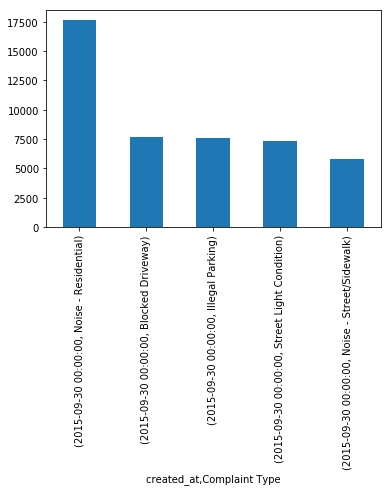

In [182]:

df2.resample('M')['Complaint Type'].value_counts().head().plot(kind='bar')
#We are limited to the first 100,000...because that is what we read in! 
#The problem with the graph below is that it is plotting type of complaint per month...not total complaints per month 

# Hmmm, it looks like a cycle

What could cause that? Try a couple comparisons to see if you can find out.

- Tip: Maybe the most popular summer complaints vs winter
- Tip: Maybe graphing the different agencies on the same graph

If you don't figure it out **that's okay!** 

In [183]:
#Can't tell from this specificially because I only read in Sept and October

## Time of day

### What time of day do people complain?

In [184]:
df2.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Complaint Type', 'Descriptor',
       'Borough', 'closed_at'],
      dtype='object')

In [185]:
df2['Created Date'].str.contains('PM').value_counts()

True     61305
False    38695
Name: Created Date, dtype: int64

In [186]:
df2['Created Date'].str.contains('AM').value_counts()

False    61305
True     38695
Name: Created Date, dtype: int64

### What time of day do people complain about potholes?

In [187]:
#df[df2['Descriptor'] == 'Pothole']['Created Date'] 

#for times in df['Created Date']:
#    if df['Created Date'] == 'PM':
#        val = 'PM'
#    else:
#        val = 'AM'

#df['Time of Day'] = df2.apply(f, axis=1)

Complaints between noon and 6pm (afternoon) 

In [188]:
df[df2.index.hour.isin([12,13,14,15,16,17,18])]


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
1,31463991,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,NaN,NaN,NaN,NaN,WEST 151 STREET,BROADWAY,INTERSECTION,NEW YORK,NaN,Precinct,Closed,09/04/2015 09:53:45 PM,The Police Department responded to the complai...,09/04/2015 06:37:24 PM,09 MANHATTAN,MANHATTAN,998728.0,241754.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.830222,-73.947684,"(40.830222460372724, -73.94768359377827)"
7,31463998,09/04/2015 12:34:05 PM,09/04/2015 01:38:47 PM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,10026.0,147 ST NICHLAS AVENUE,ST NICHLAS AVENUE,WEST 117 STREET,WEST 118 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,09/04/2015 08:34:05 PM,The Police Department responded to the complai...,09/04/2015 01:38:47 PM,10 MANHATTAN,MANHATTAN,997331.0,232400.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.804551,-73.952750,"(40.80455054003517, -73.95274989922858)"
14,31464007,09/04/2015 04:49:55 PM,09/04/2015 09:20:38 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Store/Commercial,11216.0,1266 BEDFORD AVENUE,BEDFORD AVENUE,FULTON STREET,BREVOORT PLACE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,09/05/2015 12:49:55 AM,The Police Department responded to the complai...,09/04/2015 09:20:38 PM,03 BROOKLYN,BROOKLYN,997188.0,187204.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.680499,-73.953353,"(40.680499044251285, -73.95335336624767)"
15,31464009,09/04/2015 02:39:46 PM,09/04/2015 02:52:11 PM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11373.0,90-15 QUEENS BOULEVARD,QUEENS BOULEVARD,90 STREET,WOODHAVEN BOULEVARD,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,09/04/2015 10:39:46 PM,The Police Department issued a summons in resp...,09/04/2015 02:52:11 PM,04 QUEENS,QUEENS,1019841.0,206663.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733847,-73.871578,"(40.73384724725437, -73.87157752015248)"
24,31464020,09/04/2015 03:45:14 PM,09/04/2015 04:50:16 PM,NYPD,New York City Police Department,Noise - House of Worship,Banging/Pounding,House of Worship,11423.0,196-12 JAMAICA AVENUE,JAMAICA AVENUE,196 STREET,WOODHULL AVENUE,NaN,NaN,ADDRESS,HOLLIS,NaN,Precinct,Closed,09/04/2015 11:45:14 PM,The Police Department responded to the complai...,09/04/2015 04:50:16 PM,12 QUEENS,QUEENS,1049721.0,199247.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.713321,-73.763835,"(40.71332149020221, -73.76383

In [189]:
df_afternoon = df[df2.index.hour.isin([12,13,14,15,16,17,18])]
df_afternoon['Descriptor'].value_counts().head()


Loud Music/Party    4159
Street Light Out    3375
No Access           2523
Pothole             2261
Banging/Pounding    1610
Name: Descriptor, dtype: int64

So in the afternoon, there were 2261 complaints about potholes 

Complaints in the morning

In [190]:
df_morning = df[df2.index.hour.isin([6,7,8,9,10,11])]
df_morning['Descriptor'].value_counts().head()

Street Light Out                 3381
No Access                        2744
Pothole                          1437
Posted Parking Sign Violation    1419
Loud Music/Party                 1243
Name: Descriptor, dtype: int64

In the morning, there were 1437 cases on pothole complaints 

Now, late at night

In [191]:
df_night = df[df2.index.hour.isin([19,20,21,22,23,24,1,2,3,4,5])]
df_night['Descriptor'].value_counts().head(12)

Loud Music/Party                 18481
Loud Talking                      3488
No Access                         3206
Banging/Pounding                  3137
Street Light Out                  1802
Car/Truck Music                   1172
Blocked Hydrant                   1062
Commercial Overnight Parking      1026
Partial Access                    1002
Posted Parking Sign Violation      661
Pothole                            564
Controller                         524
Name: Descriptor, dtype: int64

At night, there were 564 complaints about potholes. SO most people complain about potholes in the afternoon

### What time of day do people complain about loud parties?

#using same code above....found:
#At night: 18,481 complaints about loud parties
#In the morning: 1243 complaints
#In the afternoon: 4159 complaints 

## Days of the week

### What days of the week do people complain about potholes?

### What days of the week do people complain about loud parties?

### What do you think is the best kind of graph for describing day of the week complaints?

# Some more investigation

## Are there more homeless people in the city in the summer or in the winter?

In [192]:
df[df2.index.month.isin([6,7,8])]
#can't do this because of the limited number of cells run. But I would search per month (as indicated by the code above)
#and compare complaint types 

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


## What holiday(s) are most popular for illegal fireworks?

## Plot all kinds of noise complaints on top of each other

In [193]:
df_new = df2['Complaint Type'] == 'Noise - Residential'
df_new.value_counts()

False    74643
True     25357
Name: Complaint Type, dtype: int64

In [194]:
df[df2['Complaint Type'] == 'Noise - Residential']['Descriptor'].value_counts()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


ValueError: cannot reindex from a duplicate axis

This worked above so that I could grab the description of noise complains. But when I try to re-run I keep getting the error, 'cannot reindex from a duplicate axis. I am not doing anything with the index that I am aware of, so I don't really understand what is going on here.